In [26]:
from io import BytesIO
import cartopy.crs as ccrs 
import numpy as np
import requests
import xarray as xr
import hvplot.xarray
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = [10, 5]


def download_data(url, **kwargs):
    r = requests.get(url)
    buf = BytesIO(r.content)
    return xr.open_dataset(buf, **kwargs)    

# Generate data remotely
cmda_url = 'http://ec2-52-53-95-229.us-west-1.compute.amazonaws.com:8080/svc/diffPlot2V'
model1, var1 = 'GFDL_ESM2G', 'clt'
model2, var2 = 'NASA_MODIS', 'clt'
nSample = 10000
width, height = 1000, 500
v1 = f'{model1}:{var1}'
v2 = f'{model2}:{var2}'
cmap1, cmap2, cmap3 = 'bwr', 'rainbow', 'rainbow'
query = dict(model1=model1, var1=var1, pres1=-999999, model2=model2, var2=var2, 
             pres2=900, lonS=0, lonE=360, latS=-90, latE=90, timeS=200003, timeE=200512, colorMap1=cmap1, colorMap2=cmap2, colorMap3=cmap3)
r = requests.get(cmda_url, params=query)
data_url = r.json()['dataUrl']

# Download data into xarray Dataset object
ds = download_data(data_url, decode_times=False).rename(data1=v1, data2=v2)
ds

<xarray.Dataset>
Dimensions:         (lat: 90, lon: 144)
Coordinates:
  * lat             (lat) float64 -89.49 -87.98 -85.96 ... 85.96 87.98 89.49
  * lon             (lon) float64 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
Data variables:
    GFDL_ESM2G:clt  (lat, lon) float32 ...
    NASA_MODIS:clt  (lat, lon) float32 ...
Attributes:
    url_query_string:  model1=GFDL_ESM2G&var1=clt&pres1=-999999&model2=NASA_M...

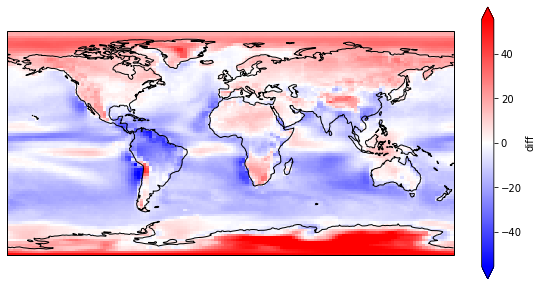

In [27]:
def plot_data(data, **kwargs):
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global(); ax.coastlines();
    return data.plot(ax=ax, transform=ccrs.PlateCarree(), **kwargs)
ds['diff'] = ds[v1] - ds[v2]
plot_data(ds['diff'], cmap=cmap1, robust=True)

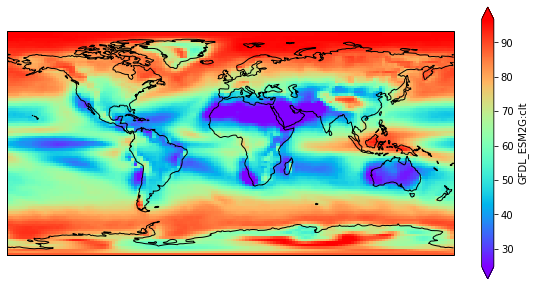

In [28]:
plot_data(ds[v1], cmap=cmap2, robust=True)

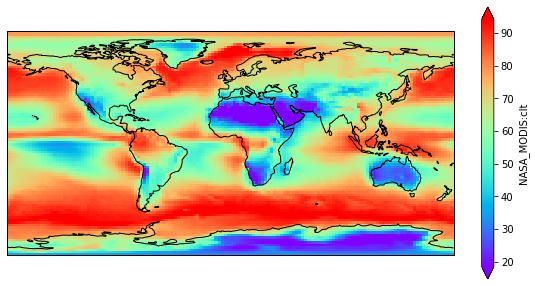

In [29]:
plot_data(ds[v2], cmap=cmap3, robust=True)